<a href="https://colab.research.google.com/github/DavidAntonio7/Machine_Learning_para_negocios_digitais/blob/main/Detec_Fraude_Aula_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Colab e Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação.
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Aula 2

## Análise com Pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('fraud_dataset_example.csv')

In [ ]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Trazendo as colunas de fraude para o começo do dataset

In [ ]:
df = df[['isFraud', 'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0      0.0             0.0     1   PAYMENT   9839.64  C1231006815   
1      0.0             0.0     1   PAYMENT   1864.28  C1666544295   
2      1.0             0.0     1  TRANSFER    181.00  C1305486145   
3      1.0             0.0     1  CASH_OUT    181.00   C840083671   
4      0.0             0.0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Renomeando as colunas

Criando um dicionário
```
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
```

In [ ]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [ ]:
df = df.rename(columns = colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0     0.0           0.0      1   PAYMENT   9839.64  C1231006815   
1     0.0           0.0      1   PAYMENT   1864.28  C1666544295   
2     1.0           0.0      1  TRANSFER    181.00  C1305486145   
3     1.0           0.0      1  CASH_OUT    181.00   C840083671   
4     0.0           0.0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

### Outras informações do dataset

In [ ]:
df.describe().T

count          mean           std   min      25%  \
fraude            27922.0  3.008380e-03  5.476712e-02  0.00     0.00   
super_fraude      27922.0  0.000000e+00  0.000000e+00  0.00     0.00   
tempo             27923.0  6.488271e+00  2.299825e+00  1.00     6.00   
valor             27923.0  1.354092e+05  3.016952e+05  1.77  5932.28   
saldo_inicial_c1  27922.0  7.748578e+05  2.135154e+06  0.00     0.00   
novo_saldo_c1     27922.0  7.908678e+05  2.176566e+06  0.00     0.00   
saldo_inicial_c2  27922.0  8.471442e+05  2.518064e+06  0.00     0.00   
novo_saldo_c2     27922.0  1.191809e+06  3.115900e+06  0.00     0.00   

                       50%          75%          max  
fraude                0.00       0.0000         1.00  
super_fraude          0.00       0.0000         0.00  
tempo                 7.00       8.0000         8.00  
valor             19110.24  159344.6400  10000000.00  
saldo_inicial_c1  19933.00  142555.2500  22352310.12  
novo_saldo_c1      4139.88  144236.5625  22465998.18  
saldo_inicial_c2      0.00  357909.9125  24955238.07  
novo_saldo_c2         0.00  644887.6325  28783585.38

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [ ]:
df.shape

(27923, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27923 entries, 0 to 27922
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fraude            27922 non-null  float64
 1   super_fraude      27922 non-null  float64
 2   tempo             27923 non-null  int64  
 3   tipo              27923 non-null  object 
 4   valor             27923 non-null  float64
 5   cliente1          27922 non-null  object 
 6   saldo_inicial_c1  27922 non-null  float64
 7   novo_saldo_c1     27922 non-null  float64
 8   cliente2          27922 non-null  object 
 9   saldo_inicial_c2  27922 non-null  float64
 10  novo_saldo_c2     27922 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


### Verificando a variável target

In [ ]:
df.groupby('fraude').tempo.count()

fraude
0.0    27838
1.0       84
Name: tempo, dtype: int64

In [ ]:
df.isnull().values.any()

True

## Encoding

### Pandas Profiling

Instalando o Pandas Profiling

```!pip install -U pandas-profiling```

In [ ]:
!pip install -U pandas-profiling



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=933d1a278677405206d9cebb38a3513b25d350872671458d05c2700da0963804
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

<ipython-input-14-78958ba0ab83>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [ ]:
df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0     0.0           0.0      1   9839.64  C1231006815          170136.0   
1     0.0           0.0      1   1864.28  C1666544295           21249.0   
2     1.0           0.0      1    181.00  C1305486145             181.0   
3     1.0           0.0      1    181.00   C840083671             181.0   
4     0.0           0.0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0             0   
1       19384.72  M2044282225               0.0            0.0             0   
2           0.00   C553264065               0.0            0.0             0   
3           0.00    C38997010           21182.0            0.0             0   
4       29885.86  M1230701703               0.0            0.0             0   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

#### Removendo variáveis

In [ ]:
df = df.drop(['cliente1','cliente2','super_fraude'],axis=1)

# Aula 3

In [ ]:
df.isnull().sum()

fraude              1
tempo               0
valor               0
saldo_inicial_c1    1
novo_saldo_c1       1
saldo_inicial_c2    1
novo_saldo_c2       1
tipo_CASH_IN        0
tipo_CASH_OUT       0
tipo_DEBIT          0
tipo_PAYMENT        0
tipo_TRANSFER       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

## Regressão Logística

In [ ]:
X = df.drop('fraude',axis=1)
y=df['fraude']

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=SEED)


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000,random_state = SEED)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
print("Acuracia: ",metrics.precision_score(y_test,y_pred))
print("Acuracia: ",metrics.recall_score(y_test,y_pred))
print("Acuracia: ",metrics.f1_score(y_test,y_pred))

Acuracia:  0.9967053430740581
Acuracia:  0.6666666666666666
Acuracia:  0.16
Acuracia:  0.25806451612903225


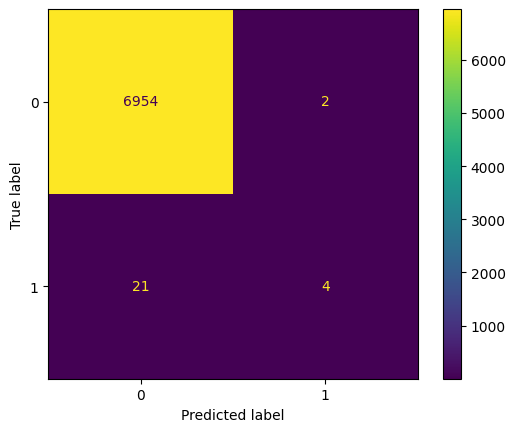

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

cm=metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

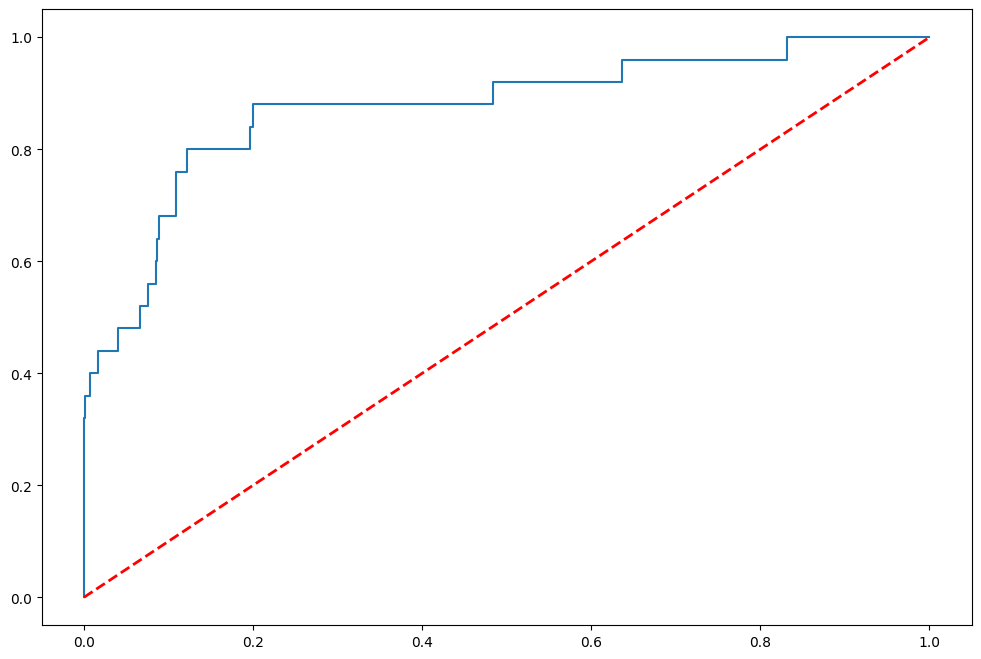

In [ ]:
y_pred_proba = LR.predict_proba(x_test)[::,1]
[fpr,tpr,_] = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize']=(12,8)
plt.plot(fpr,tpr,label="LR,auc="+str(auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')

## Balanceamento de dados

In [ ]:
df.groupby('fraude').tempo.count()

fraude
0.0    27838
1.0       84
Name: tempo, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote=SMOTE(random_state=42)

In [ ]:
x= df.drop('fraude',axis=1)
y=df['fraude']

In [ ]:
x_resampled,y_resampled = smote.fit_resample(x,y)

In [ ]:
df_balanced = pd.concat([y_resampled,x_resampled],axis=1)
df_balanced.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0     0.0      1   9839.64          170136.0      160296.36               0.0   
1     0.0      1   1864.28           21249.0       19384.72               0.0   
2     1.0      1    181.00             181.0           0.00               0.0   
3     1.0      1    181.00             181.0           0.00           21182.0   
4     0.0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0             0              0           0             1   
1            0.0             0              0           0             1   
2            0.0             0              0           0             0   
3            0.0             0              1           0             0   
4            0.0             0              0           0             1   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

In [ ]:
df_balanced.groupby('fraude').tempo.count()

fraude
0.0    27838
1.0    27838
Name: tempo, dtype: int64

#####Novo teste de regressao logistica

In [ ]:
X = df_balanced.drop('fraude',axis=1)
y=df_balanced['fraude']

###########
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=SEED)

###########
LR = LogisticRegression(max_iter=1000,random_state = SEED)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("F1: ",metrics.f1_score(y_test,y_pred))

Acuracia:  0.940512967885624
Precision:  0.917358747447243
Recall:  0.9682425635867222
F1:  0.9421140939597316


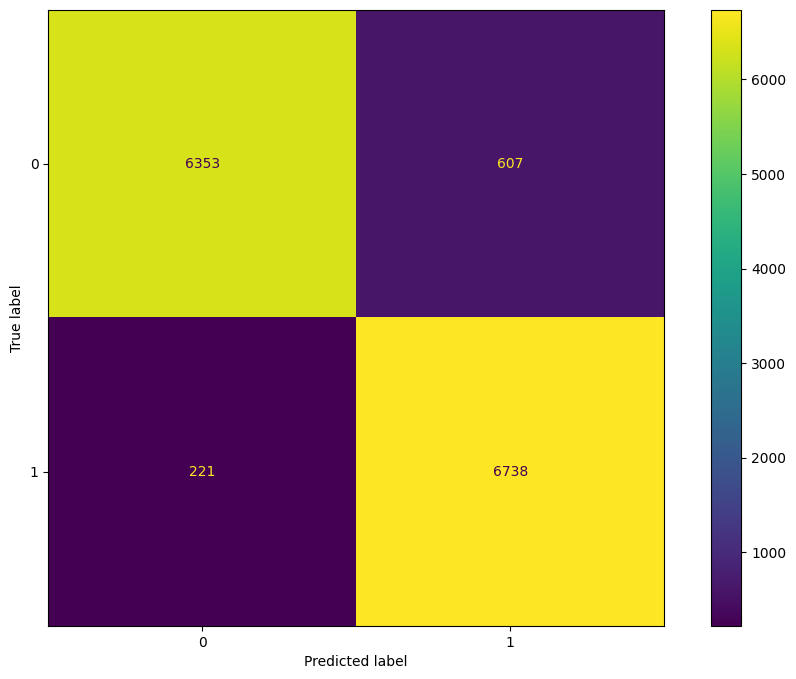

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

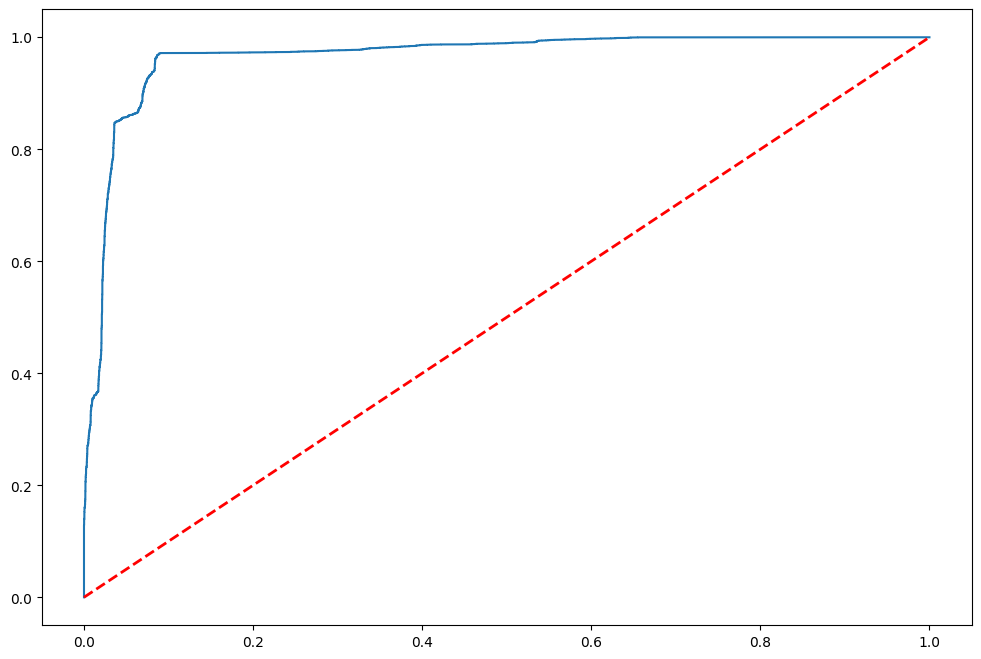

In [ ]:
y_pred_proba = LR.predict_proba(x_test)[::,1]
[fpr,tpr,_] = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize']=(12,8)
plt.plot(fpr,tpr,label="LR,auc="+str(auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')

## Formulando as hipóteses

In [ ]:
pandas_profiling.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Inserir as hipóteses aqui!** (dê um duplo clique na célula)

tipo_payment e'  que a pessoa utiliza como padrao e a fraude ocorre por meio do tipo_transfer

-a fraude pode ocorrer em pariodos diferente de horario ou mes em que o cliente utiliza

# Aula 4

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,random_state=SEED)

In [ ]:
model = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("F1: ",metrics.f1_score(y_test,y_pred))

Acuracia:  0.9755011135857461
Precision:  0.9659250915235145
Recall:  0.9857738180773099
F1:  0.975748524287035


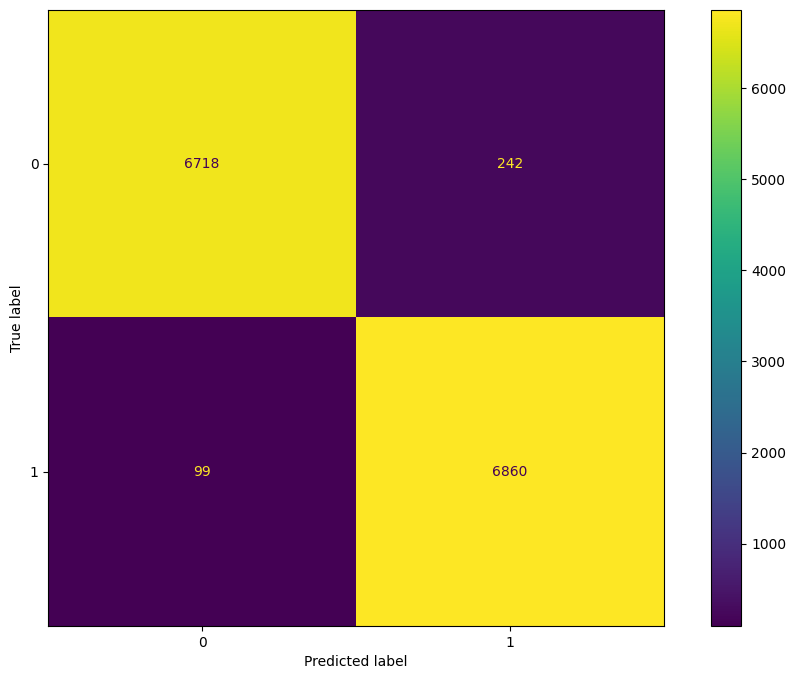

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

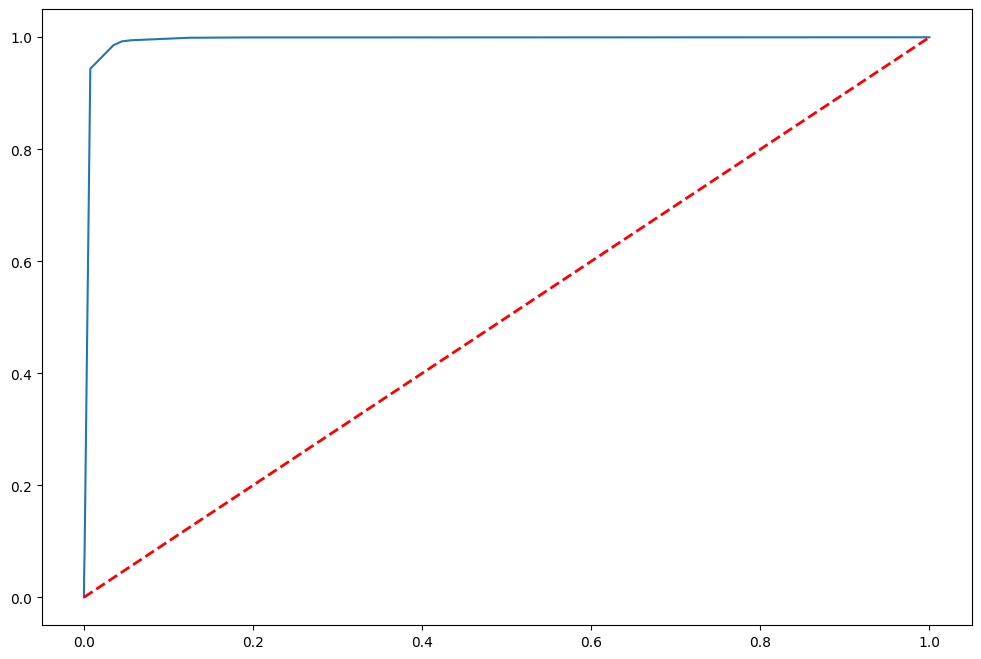

In [ ]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
[fpr,tpr,_] = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize']=(12,8)
plt.plot(fpr,tpr,label="LR,auc="+str(auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=5,random_state = SEED)

In [ ]:
model = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("F1: ",metrics.f1_score(y_test,y_pred))

Acuracia:  0.9895107407141318
Precision:  0.9827122006518351
Recall:  0.9965512286248024
F1:  0.9895833333333334


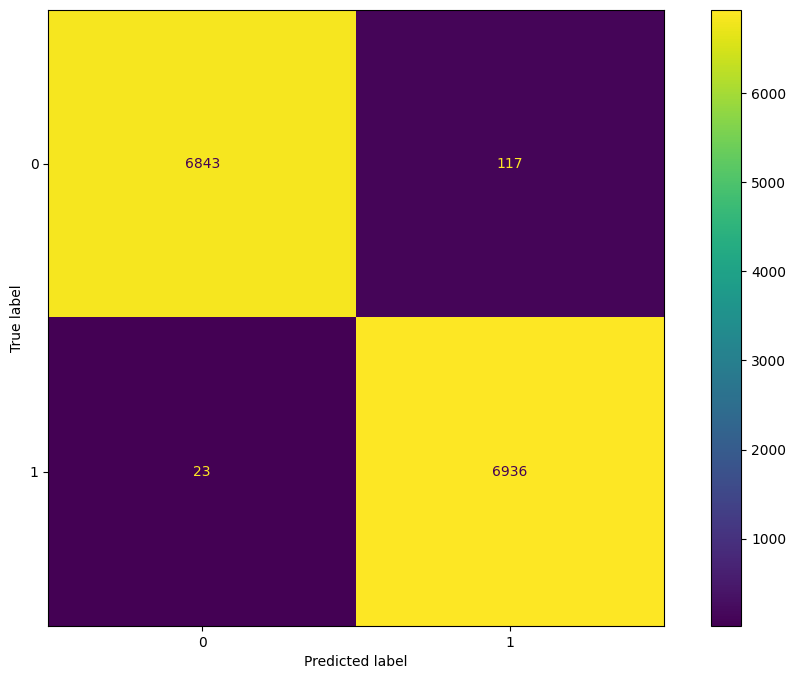

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

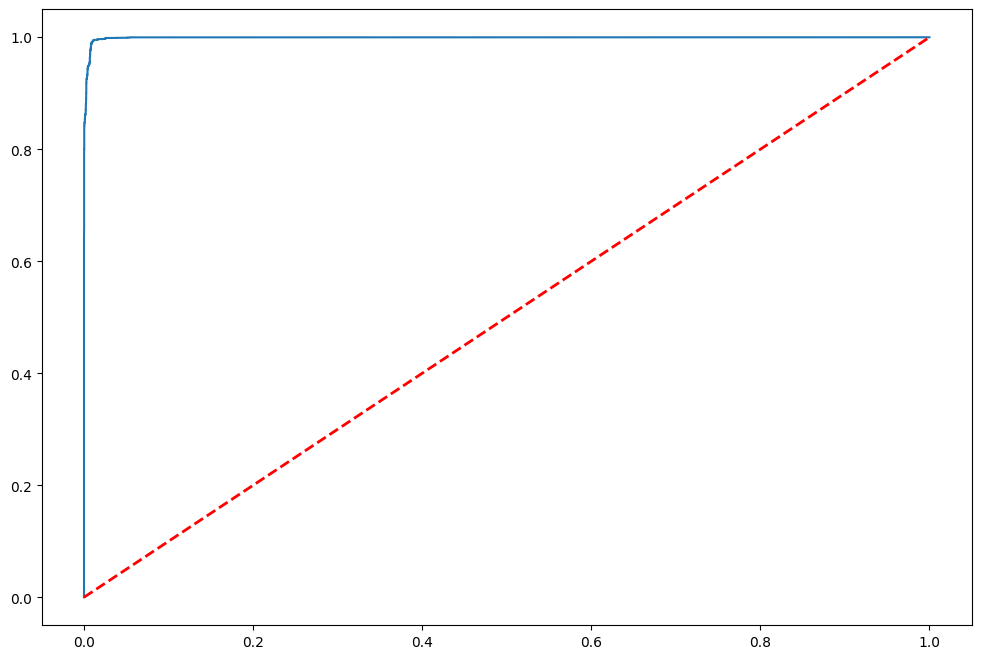

In [ ]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
[fpr,tpr,_] = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize']=(12,8)
plt.plot(fpr,tpr,label="LR,auc="+str(auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')

## Análise de Métricas

In [ ]:
classificadores = [
    LogisticRegression(max_iter=1000,random_state = SEED),
    DecisionTreeClassifier(max_depth=5,random_state=SEED),
    RandomForestClassifier(max_depth=5,random_state = SEED)
]


******************************
LogisticRegression
*****Resultados*****
Acuracia:  0.940512967885624
Precision:  0.917358747447243
Recall:  0.9682425635867222
F1:  0.9421140939597316
******************************
DecisionTreeClassifier
*****Resultados*****
Acuracia:  0.9755011135857461
Precision:  0.9659250915235145
Recall:  0.9857738180773099
F1:  0.975748524287035
******************************
RandomForestClassifier
*****Resultados*****
Acuracia:  0.9899418061642359
Precision:  0.9834113143343258
Recall:  0.9966949274321023
F1:  0.9900085640879246


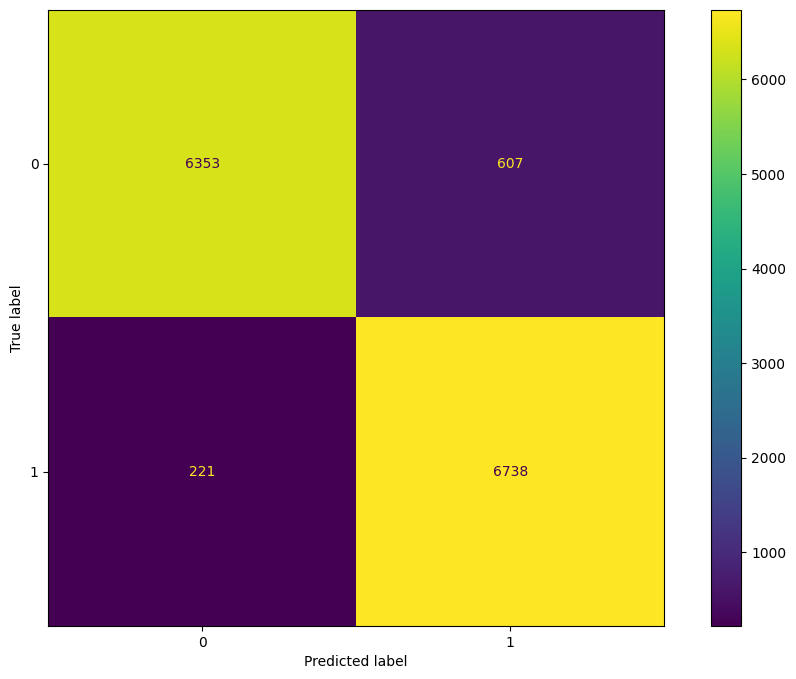

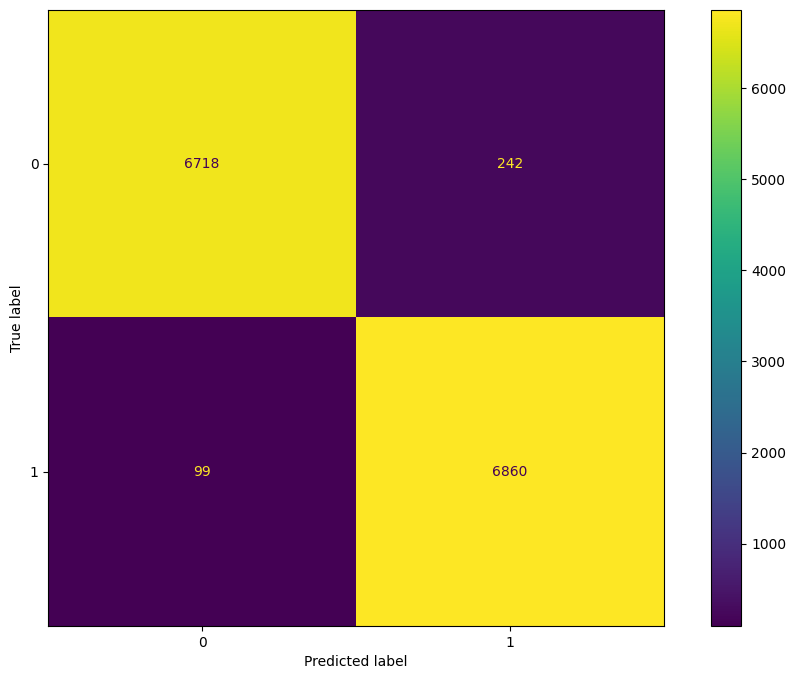

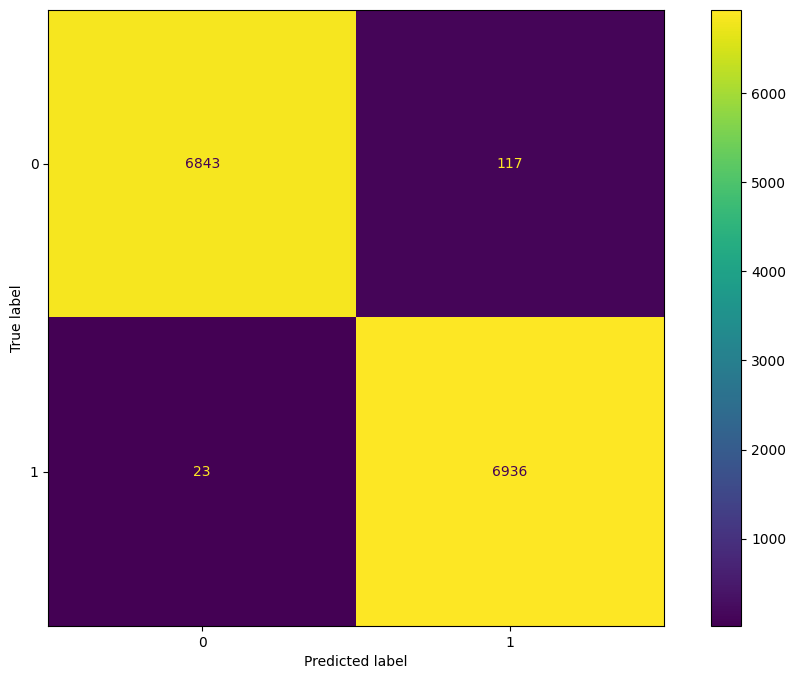

In [ ]:
for classificador in classificadores:
  classificador.fit(x_train,y_train)
  name = classificador.__class__.__name__
  print('*'*30)
  print(name)
  print('*****Resultados*****')
  y_pred = classificador.predict(x_test)
  print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
  print("Precision: ",metrics.precision_score(y_test,y_pred))
  print("Recall: ",metrics.recall_score(y_test,y_pred))
  print("F1: ",metrics.f1_score(y_test,y_pred))

  cm=metrics.confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot()


# Aula 5

## Melhorando o modelo

In [ ]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [ ]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED=70

rforest= RandomForestClassifier(random_state = SEED)

In [ ]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [ ]:
rcv = random_cv.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.461183      1.305118         0.255832        0.013003   
1       2.855393      0.248700         0.251532        0.091620   
2       3.497401      1.187394         0.099526        0.008629   
3       4.606715      0.797939         0.195812        0.025158   
4       4.776903      0.919981         0.233315        0.054465   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.999353   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.912275   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.998922   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.999138   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.912275   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999892           0.999353         0.999533        0.000254   
1           0.978233           0.971980         0.954163        0.029729   
2           1.000000           0.997845         0.998922        0.000880   
3           1.000000           0.999138         0.999425        0.000406   
4           0.979526           0.971549         0.954450        0.029999   

   rank_test_score  
0                1  
1                5  
2                3  
3                2  
4                4

In [ ]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

## Resultados Finais

In [ ]:
rfn = RandomForestClassifier(**rcv.best_params_,random_state = SEED)
model = rfn.fit(x_train,y_train)
y_pred = rfn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
  print("Acuracia: ",metrics.accuracy_score(y_test,y_pred))
  print("Precision: ",metrics.precision_score(y_test,y_pred))
  print("Recall: ",metrics.recall_score(y_test,y_pred))
  print("F1: ",metrics.f1_score(y_test,y_pred))

Acuracia:  0.9965514763991666
Precision:  0.993854509075318
Recall:  0.9992815059635005
F1:  0.9965606190885642


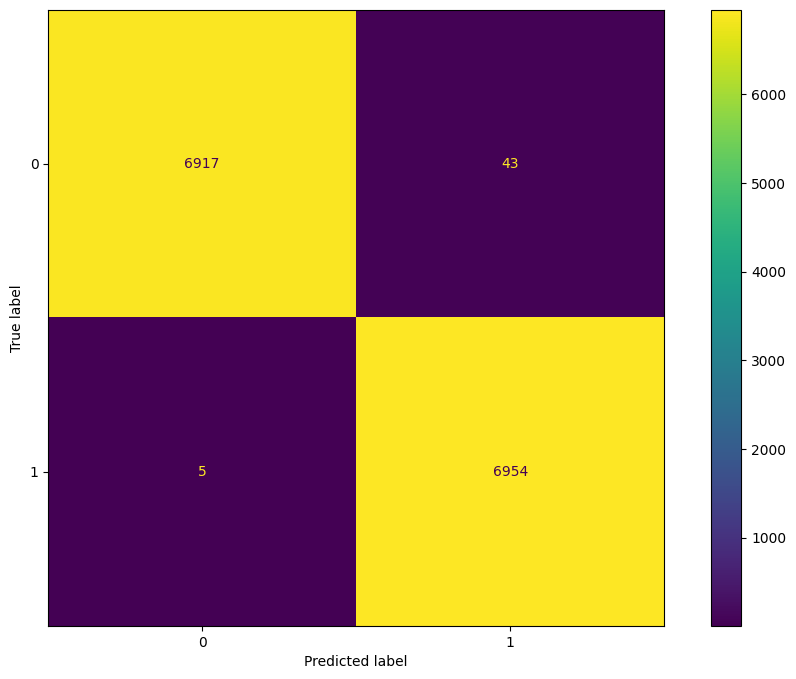

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Conclusão

**Inserir as soluções para cada hipótese aqui!** (dê um duplo clique na célula)

• O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial, e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

• Ainda em relação ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.

  - Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.COPIAR CÓDIGO
• O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada*, e a fraude pode ocorrer por um pagamento por transferência.

  - Solicitar uma verificação de inf